In [2]:
import numpy as np
import pandas as pd

In [4]:
df_good = pd.read_pickle(fr'Q:\sachuriga\CR_CA1_paper\tables/functional_properties_with_python_measurements_with_stability.pkl')

In [ ]:
df_ko_py = df_good[(df_good['buzaki_py_cell_type']=='pyramidal') & (df_good['session'] == 'A') & (df_good['genotype']=='NDNF-flp-/- and Pde1c -/-')]
df_het_py = df_good[(df_good['buzaki_py_cell_type']=='pyramidal') & (df_good['session'] == 'A') & (df_good['genotype']=='NDNF-flp +/- and Pde1c +/-')]
df_ko_int = df_good[(df_good['buzaki_py_cell_type']=='narrow_spike_interneurons') & (df_good['session'] == 'A') & (df_good['genotype']=='NDNF-flp-/- and Pde1c -/-')]
df_het_int = df_good[(df_good['buzaki_py_cell_type']=='narrow_spike_interneurons') & (df_good['session'] == 'A') & (df_good['genotype']=='NDNF-flp +/- and Pde1c +/-')]




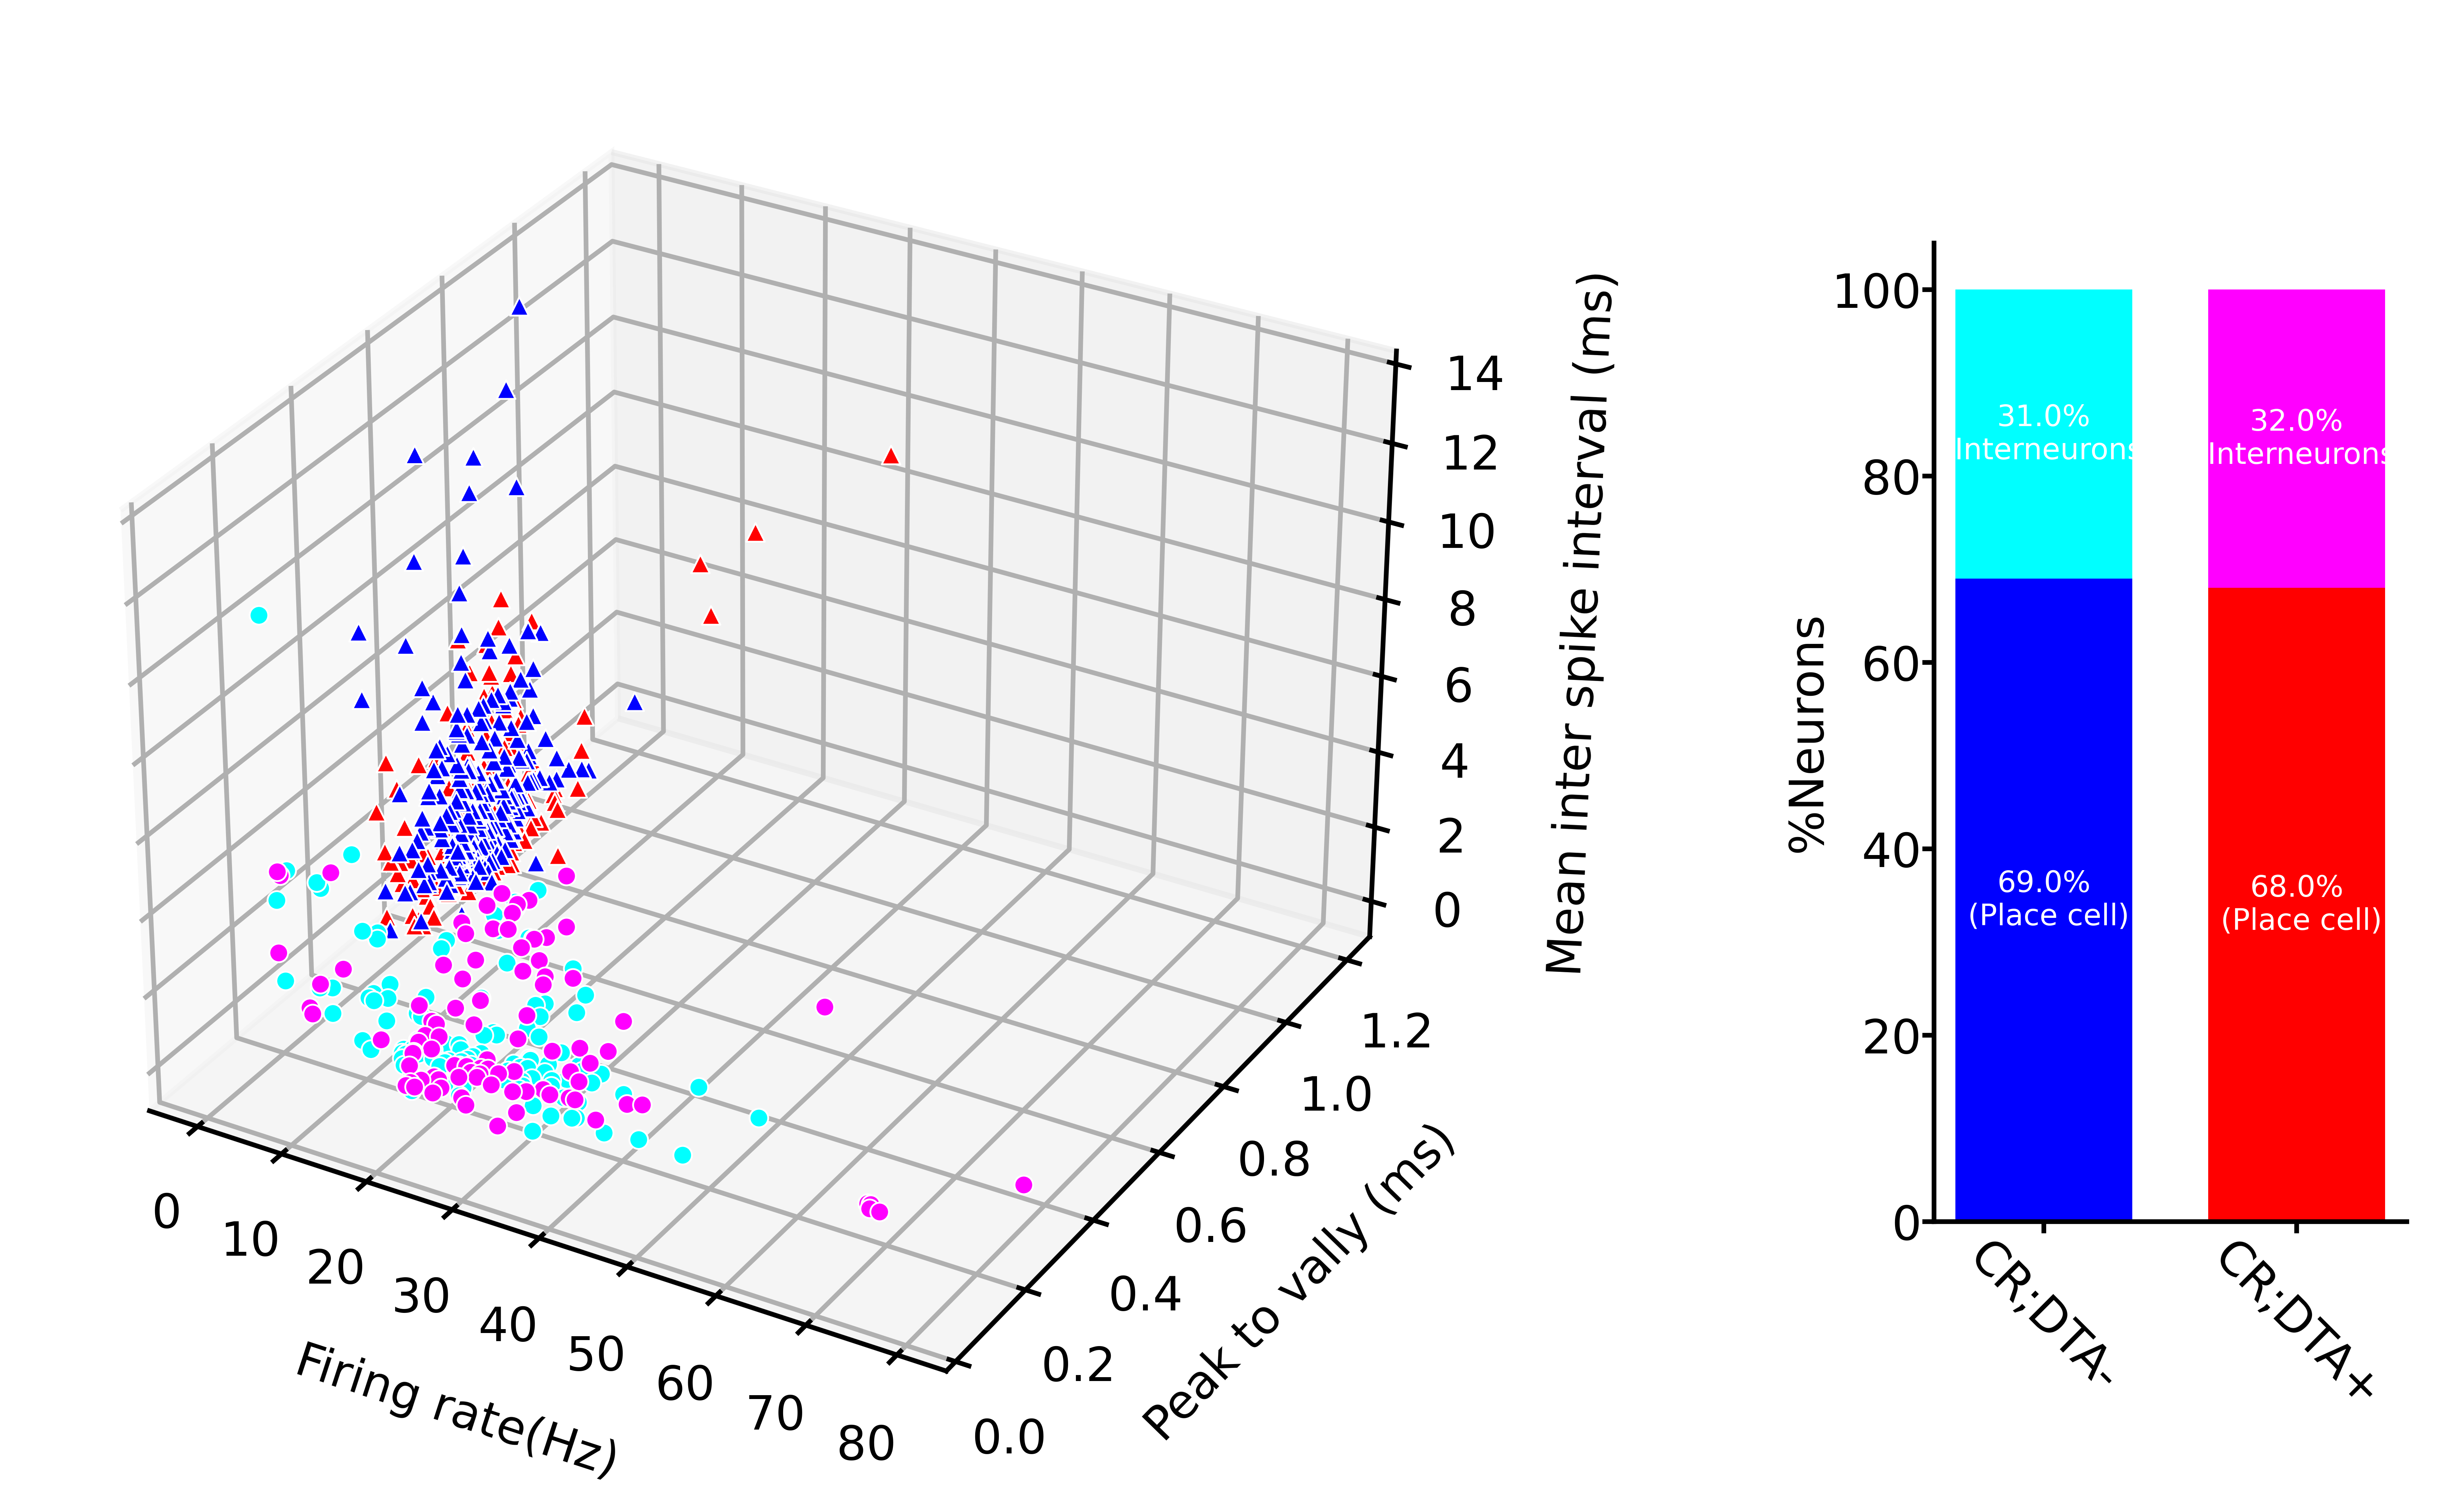

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(7.2, 6),dpi=1200)
plt.rcParams.update({'font.size': 8,'font.family': 'DejaVu Sans'})
gs = gridspec.GridSpec(1, 3, height_ratios=[1], width_ratios=[1,1,1], wspace=1)  # First row taller
                                                              
plt.rcParams.update({
    'axes.labelpad': 0.1,
    'ytick.major.pad': 0.1,
    'xtick.major.pad': 0.1,
    'ytick.major.size': 2,
    'xtick.major.size': 2
})
s=10
lw=.31
ax = fig.add_subplot(gs[0, 0:2], projection='3d')
ax1 = fig.add_subplot(gs[0, 2])

# Create scatter plot
ax.scatter(
    df_ko_py['Averate_rate'], 
    df_ko_py['peak_to_valley']*1000,
    df_ko_py['mean_inter_spike_interval'], 
    c='blue', 
    marker='^',
    s=s,
    edgecolors='white',
    linewidths=lw,
    alpha=1
)
# Create scatter plot
ax.scatter(
    df_ko_int['Averate_rate'], 
    df_ko_int['peak_to_valley']*1000,
    df_ko_int['mean_inter_spike_interval'], 
    c='cyan', 
    marker='o',
    s=s,
    edgecolors='white',
    linewidths=lw,
    alpha=1
)

# Create scatter plot
ax.scatter(
    df_het_py['Averate_rate'], 
    df_het_py['peak_to_valley']*1000,
    df_het_py['mean_inter_spike_interval'], 
    c='red', 
    marker='^',
    s=s,
    edgecolors='white',
    linewidths=lw,
    alpha=1
)
# Create scatter plot
ax.scatter(
    df_het_int['Averate_rate'], 
    df_het_int['peak_to_valley']*1000,
    df_het_int['mean_inter_spike_interval'], 
    c='magenta', 
    marker='o',
    s=s,
    edgecolors='white',
    linewidths=lw,
    alpha=1
)
ax.set_ylim(0,1.25)
ax.set_xlabel('Firing rate(Hz)')
ax.set_ylabel('Peak to vally (ms)')
ax.set_zlabel('Mean inter spike interval (ms)')

con_all = len(df_ko_py) + len(df_ko_int)
exp_all = len(df_het_py) + len(df_het_int)
# Data
groups = ['CR;DTA-', 'CR;DTA+']
counts = [
    [round(len(df_ko_py)/con_all,2)*100, round(len(df_ko_int)/con_all,2)*100], 
    [round(len(df_het_py)/exp_all,2)*100, round(len(df_het_int)/exp_all,2)*100], 
]
percentages = [
    [round(len(df_ko_py)/con_all,2)*100, round(len(df_ko_int)/con_all,2)*100], 
    [round(len(df_het_py)/exp_all,2)*100, round(len(df_het_int)/exp_all,2)*100],  
]

# Colors
colors = ['blue', "cyan"]  # For CRs +
colors1 = ['red', "magenta"]    # For CRs -

# Create bar chart
ax=ax1
# Get current position [left, bottom, width, height]
pos = ax1.get_position()
# Adjust height (e.g., reduce to 50% of original height)
ax1.set_position([pos.x0, pos.y0 + 0.2, pos.width, pos.height * 0.5])


# Set positions for bars to be closer
bar_width = 0.35  # Reduced width to bring bars closer
x = np.arange(len(groups))  # Create positions for the bars
x = x * 0.5  # Scale x positions to reduce gap between bars

# Plot stacked bars
bars = []
for i in range(len(counts[0])):  # For each category (0 and 1)
    # Create bars for each group with appropriate colors
    bar = ax.bar(x, [counts[j][i] for j in range(len(counts))], 
                 bottom=[sum(counts[j][:i]) for j in range(len(counts))], 
                 color=[colors[i] if j == 0 else colors1[i] for j in range(len(counts))], 
                 label=f'Category {i+1}' if i == 0 else None, 
                 width=bar_width)
    bars.append(bar)

# Add count and percentage labels on top of each segment
for i, bar_group in enumerate(bars):
    if i==0:
        cell_type = "(Place cell)"
    else:
        cell_type = "(Interneurons)"
    for j, bar in enumerate(bar_group):
        height = bar.get_height()
        total = sum(counts[j])
        bottom = sum(counts[j][:i])
        ax.text(bar.get_x() + bar.get_width()/2, bottom + height/2, 
                f'{percentages[j][i]}%\n {cell_type}', ha='center', va='center', rotation=0, color='white',fontsize=5)

# Customize the plot
ax1.set_ylabel('%Neurons')
ax1.set_xticks(x)
ax1.set_xticklabels(groups, rotation = -45)
ax1.legend().set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.savefig(r'Q:/sachuriga/CR_CA1_paper/Figures/suppfig8.png', transparent=True, dpi=1200, bbox_inches='tight')